In [51]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import CondensedNearestNeighbour

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/waveform_data.csv")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


In [5]:
correlation_matrix = df.corr()
print(correlation_matrix)

           0         1         2         3         4         5         6  \
0   1.000000  0.003445 -0.012182 -0.008974 -0.010520  0.003936 -0.009380   
1   0.003445  1.000000  0.168465  0.213244  0.260190  0.271216  0.258219   
2  -0.012182  0.168465  1.000000  0.372892  0.430006  0.440335  0.440655   
3  -0.008974  0.213244  0.372892  1.000000  0.558078  0.570066  0.565426   
4  -0.010520  0.260190  0.430006  0.558078  1.000000  0.655717  0.655947   
5   0.003936  0.271216  0.440335  0.570066  0.655717  1.000000  0.715144   
6  -0.009380  0.258219  0.440655  0.565426  0.655947  0.715144  1.000000   
7  -0.003983  0.212376  0.355403  0.430403  0.529678  0.609012  0.681378   
8   0.014483  0.134737  0.209571  0.260621  0.300970  0.426313  0.520954   
9   0.025222 -0.004828 -0.003468 -0.004680  0.002807  0.134934  0.222589   
10  0.031390 -0.124312 -0.208134 -0.283565 -0.318316 -0.209955 -0.117340   
11  0.007920 -0.207686 -0.357164 -0.456966 -0.527066 -0.485205 -0.419717   
12  0.008378

In [36]:
y_column_name = df.columns[21]
y = df[y_column_name]
df.drop(columns=[y_column_name], inplace=True)
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

IndexError: ignored

In [39]:
df.shape

(5000, 21)

In [7]:
knn=KNeighborsClassifier(n_neighbors=56)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=56)

In [8]:
accuracy_score(y_test,knn.predict(x_test))

0.857

In [29]:
k=list(range(1,100))
accuracies=[]
variances=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_train,y=y_train,cv=5,scoring="accuracy")
    accuracies.append(np.mean(c_v))
    variances.append(np.var(c_v))

Text(0.5, 1.0, 'Accuracy on Training Dataset for different values of k')

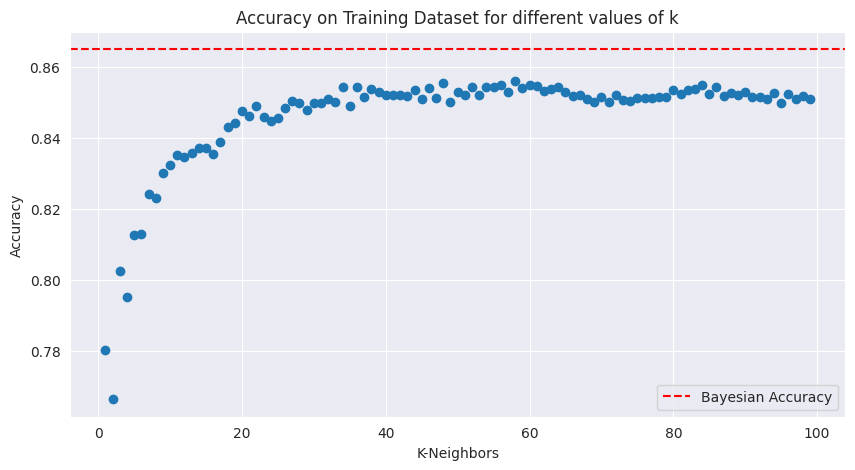

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=accuracies)
plt.xlabel('K-Neighbors')
plt.ylabel("Accuracy")
plt.axhline(0.865,linestyle='--',color='r',label= 'Bayesian Accuracy')
plt.legend()
plt.title("Accuracy on Training Dataset for different values of k")

In [28]:
history=pd.DataFrame({'Neighbours':k,'accuracies':accuracies})
print(max(history['accuracies']))

0.8560000000000001


In [38]:
df.head

<bound method NDFrame.head of          0     1     2     3     4     5     6     7     8     9  ...    11  \
0    -1.23 -1.56 -1.75 -0.28  0.60  2.22  0.85  0.21 -0.20  0.89  ...  4.20   
1    -0.69  2.43  0.61  2.08  2.30  3.25  5.52  4.55  2.97  2.22  ...  1.61   
2    -0.12 -0.94  1.29  2.59  2.42  3.55  4.94  3.25  1.90  2.07  ...  1.45   
3     0.86  0.29  2.19 -0.02  1.13  2.51  2.37  5.45  5.45  4.84  ...  4.05   
4     1.16  0.37  0.40 -0.59  2.66  1.00  2.69  4.06  5.34  3.53  ...  4.79   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4995 -0.65  0.69  2.29 -0.16  0.51  0.26  2.34 -0.42  0.49  0.31  ...  4.54   
4996 -0.02  0.67  2.34  3.18  2.16  4.77  6.70  4.54  4.92  3.39  ...  1.50   
4997  0.01 -1.99  0.16  2.30 -0.53  1.93  3.61  3.00  4.61  5.73  ...  4.25   
4998 -0.40  0.41 -0.48  1.04  0.79 -0.66  1.18  0.52  2.20  0.59  ...  4.85   
4999  0.63 -0.07  2.71  2.55  3.36  3.22  3.69  4.67  3.45  3.87  ...  1.46   

        12    13    1

In [35]:
df1=pd.DataFrame(df)
scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)

(5000, 3)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
knn=KNeighborsClassifier(n_neighbors=56)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=56)

In [45]:
k=list(range(1,100))
accuracies=[]
variances=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=x_train,y=y_train,cv=5,scoring="accuracy")
    accuracies.append(np.mean(c_v))
    variances.append(np.var(c_v))

Text(0.5, 1.0, 'Accuracy on Training Dataset for different values of k')

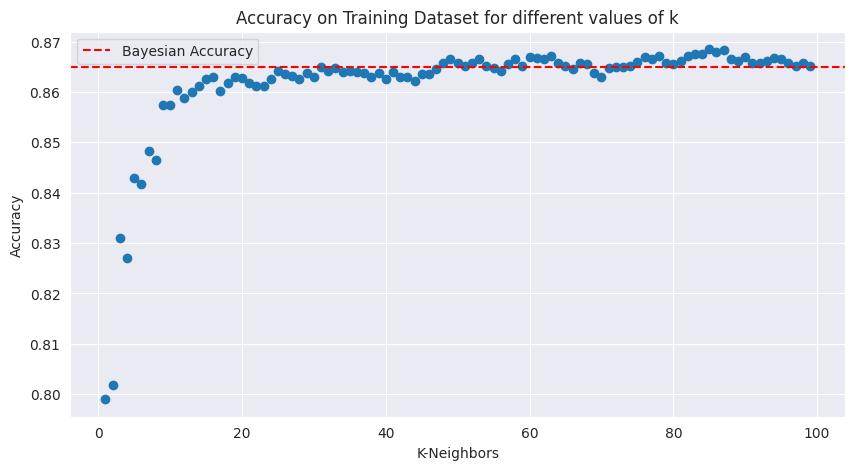

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=accuracies)
plt.xlabel('K-Neighbors')
plt.ylabel("Accuracy")
plt.axhline(0.865,linestyle='--',color='r',label= 'Bayesian Accuracy')
plt.legend()
plt.title("Accuracy on Training Dataset for different values of k")

In [58]:
history=pd.DataFrame({'Neighbours':k,'accuracies':accuracies})
print(max(history['accuracies']))

0.8685
